In [1]:
# Import necessary libraries
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
data = pd.read_csv('../data/processed/iris_preprocessed.csv')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [3]:
# Separate the features and target
X = data.drop('species', axis=1).values
y = data['species'].values

In [4]:
# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Convert arrays to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [6]:
# Create a TensorDataset and DataLoader
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [7]:
# Define the network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [8]:
# Create an instance of the network, loss function and optimizer
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [10]:
# Create a list to store losses
train_losses = []

# Training loop
for epoch in range(200):
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Append the loss to the list of losses
    train_losses.append(loss.item())

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print('Epoch [{}/200], Loss: {:.4f}'.format(epoch+1, loss.item()))

Epoch [1/200], Loss: 0.0000
Epoch [11/200], Loss: 0.0000
Epoch [21/200], Loss: 0.0000
Epoch [31/200], Loss: 0.0001
Epoch [41/200], Loss: 0.0000
Epoch [51/200], Loss: 0.0000
Epoch [61/200], Loss: 0.0000
Epoch [71/200], Loss: 0.0000
Epoch [81/200], Loss: 0.0000
Epoch [91/200], Loss: 0.0000
Epoch [101/200], Loss: 0.0000
Epoch [111/200], Loss: 0.0000
Epoch [121/200], Loss: 0.0000
Epoch [131/200], Loss: 0.0001
Epoch [141/200], Loss: 0.0000
Epoch [151/200], Loss: 0.0000
Epoch [161/200], Loss: 0.0000
Epoch [171/200], Loss: 0.0000
Epoch [181/200], Loss: 0.0000
Epoch [191/200], Loss: 0.0000


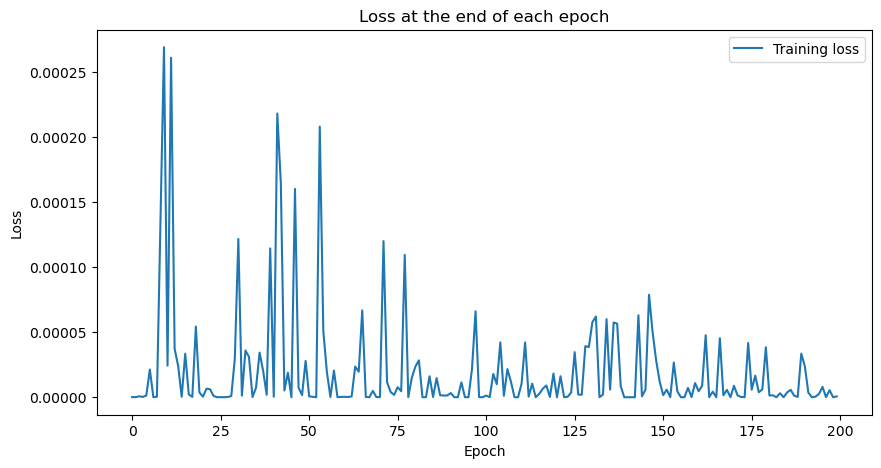

In [11]:
import matplotlib.pyplot as plt

# Plot the training losses
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training loss')
plt.title('Loss at the end of each epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy: {} %'.format(100 * correct / total)) 

Test Accuracy: 100.0 %
